C:\Users\tranh\AppData\Local\Temp\ipykernel_6348\3657028995.py:12: DtypeWarning: Columns (0,5,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("data/bank-full.csv", names=column_names, sep=";", skipinitialspace=True)


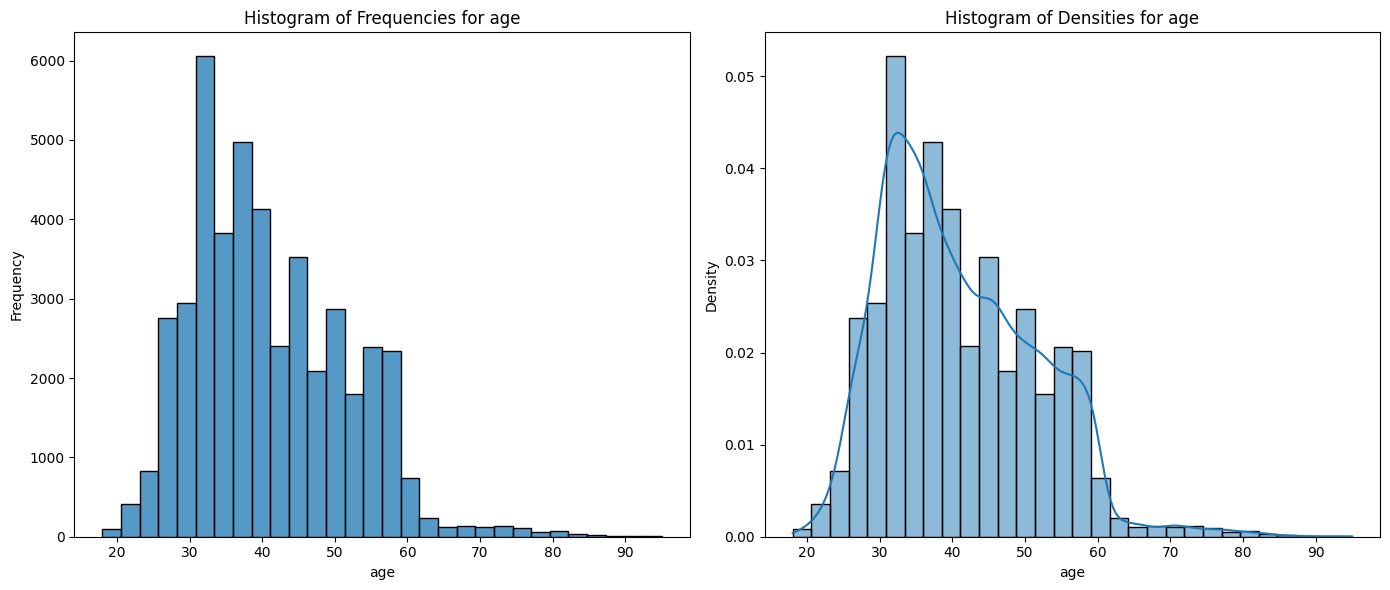

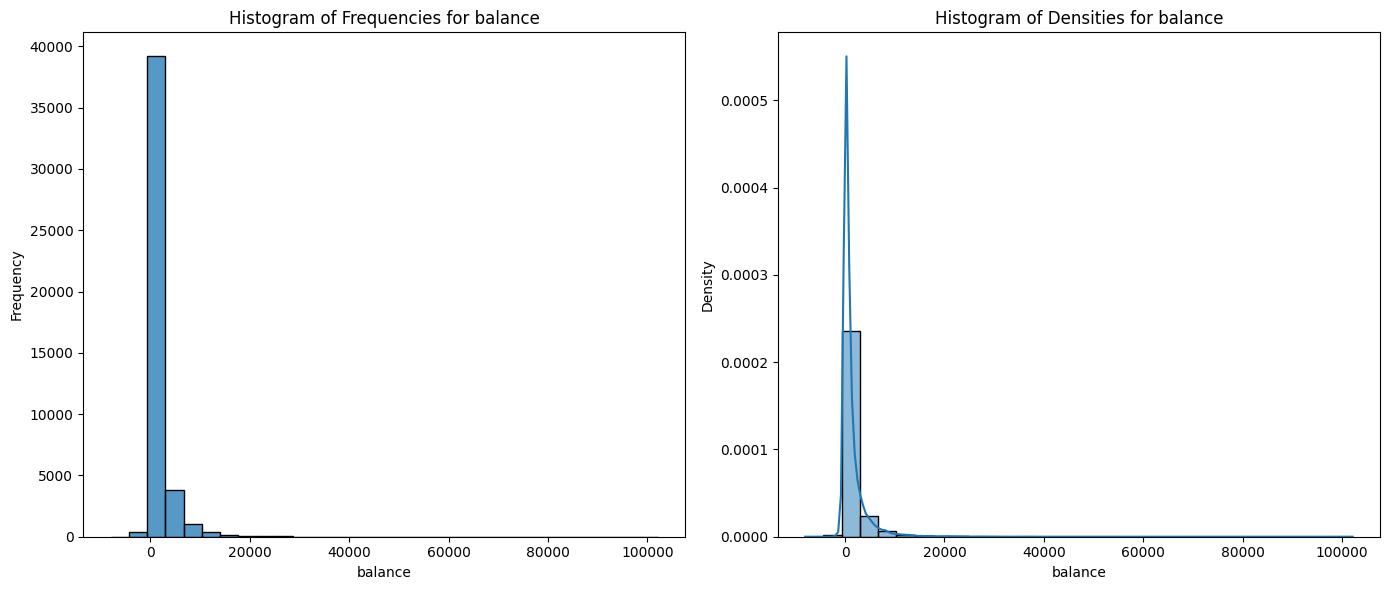

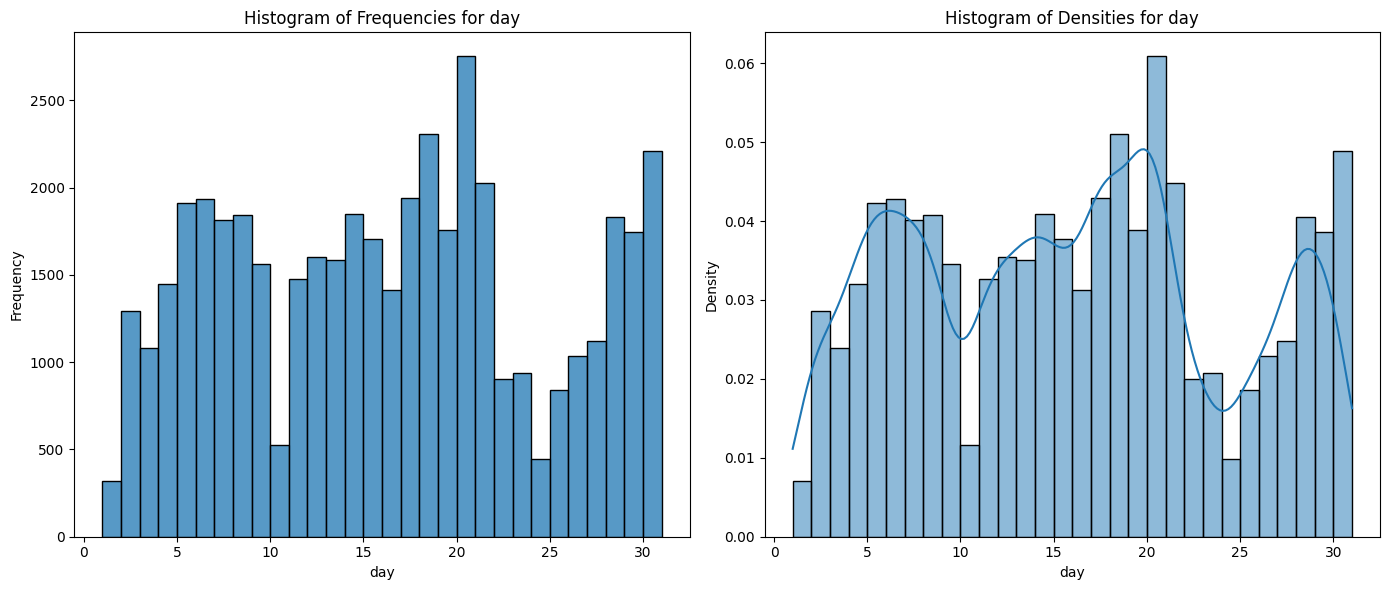

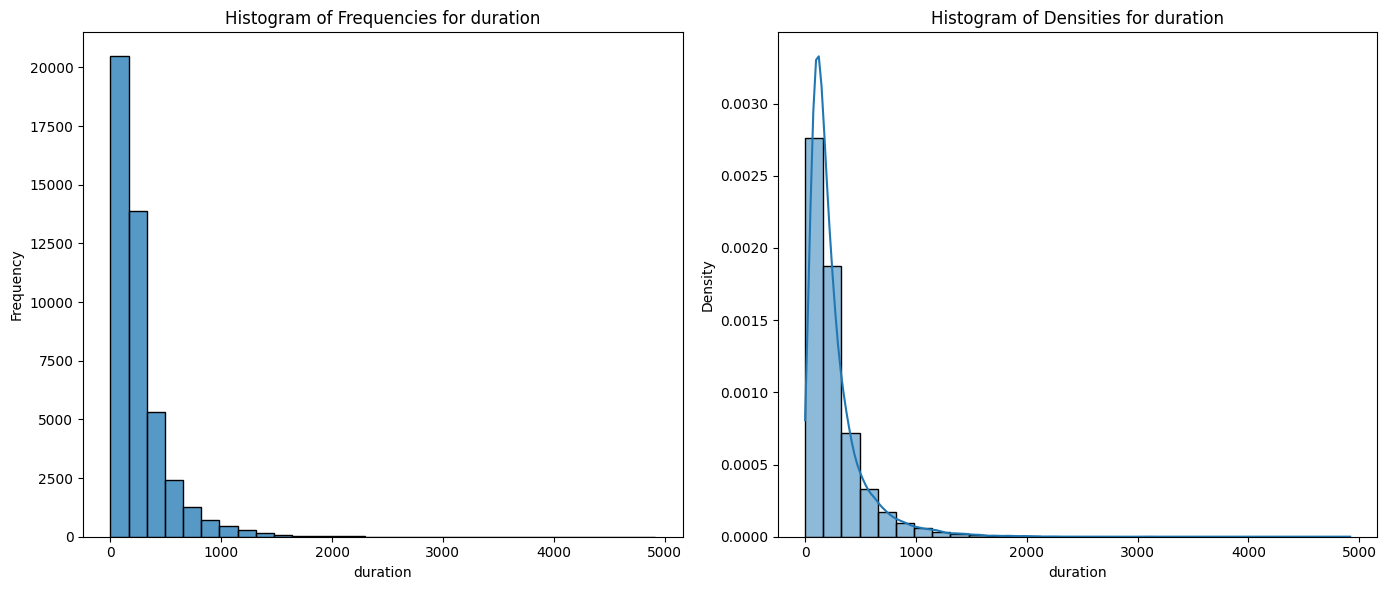

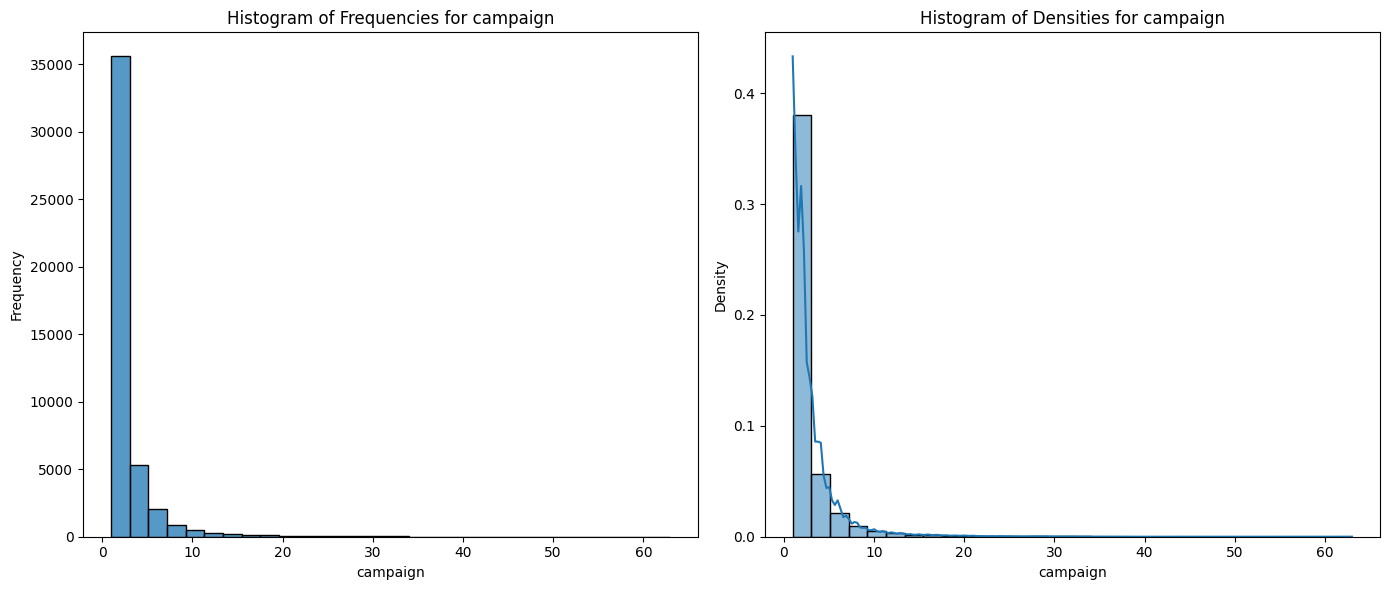

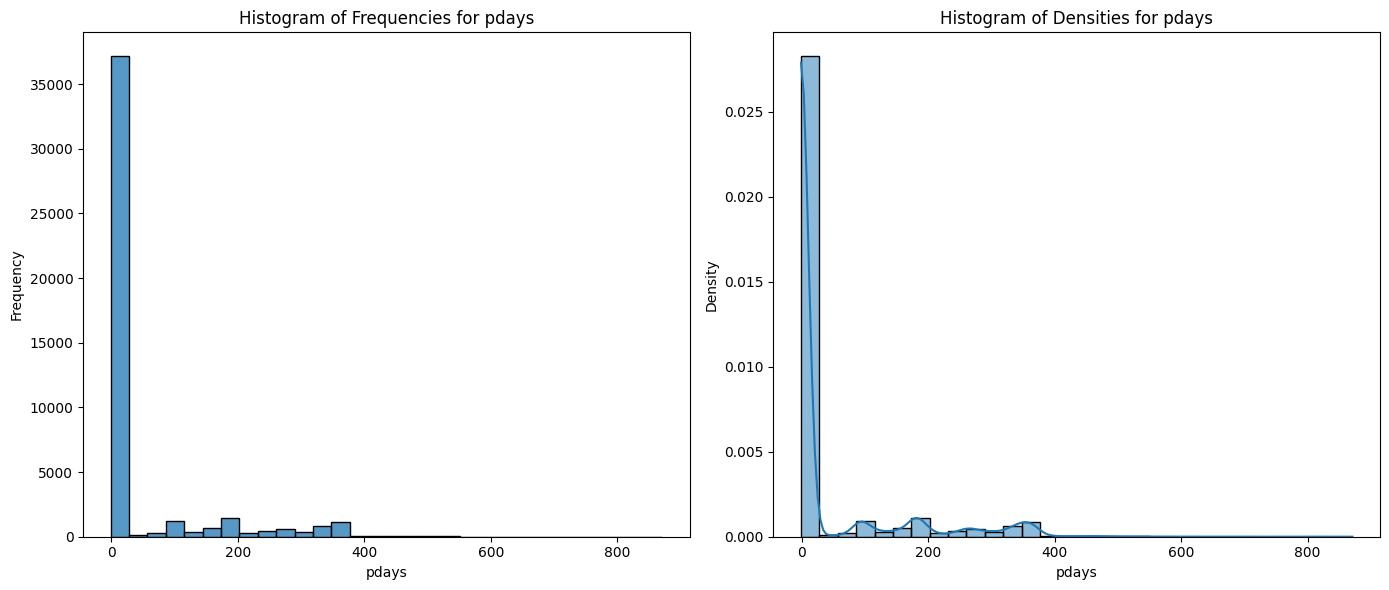

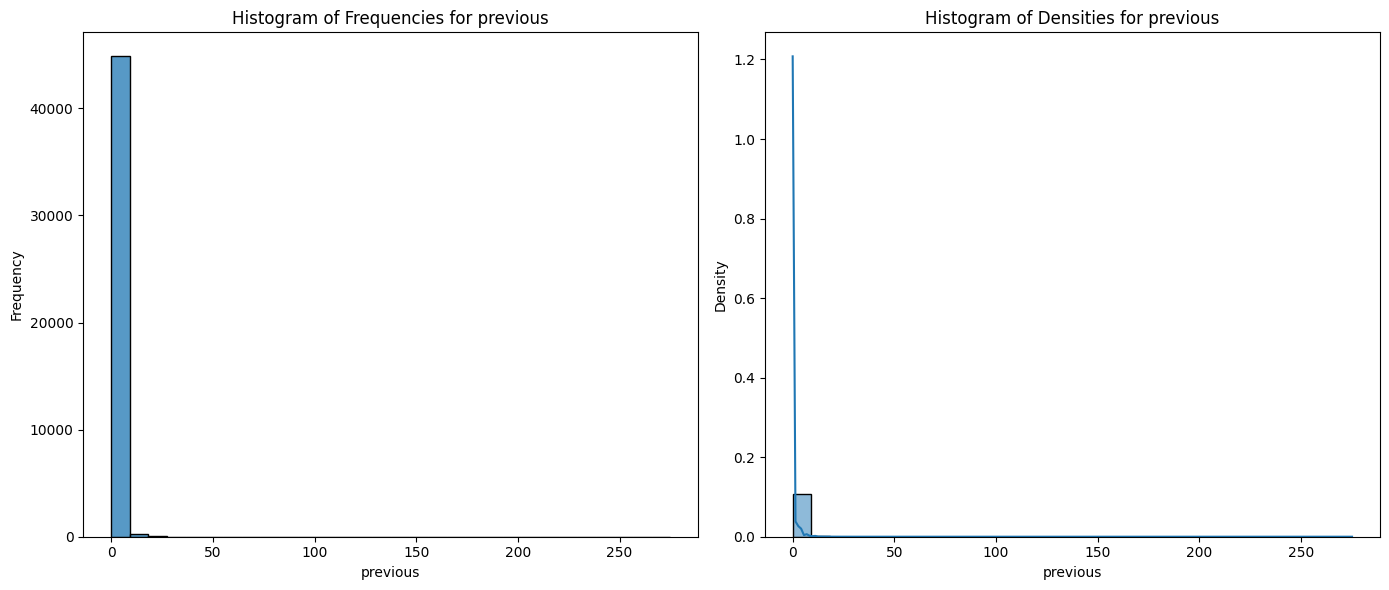

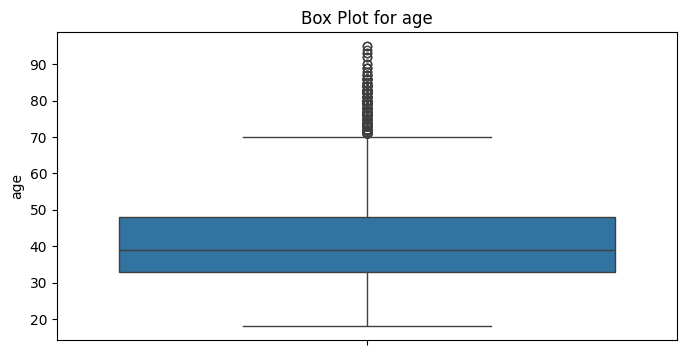

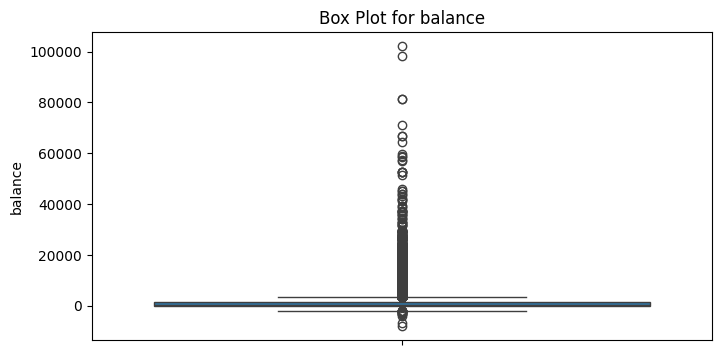

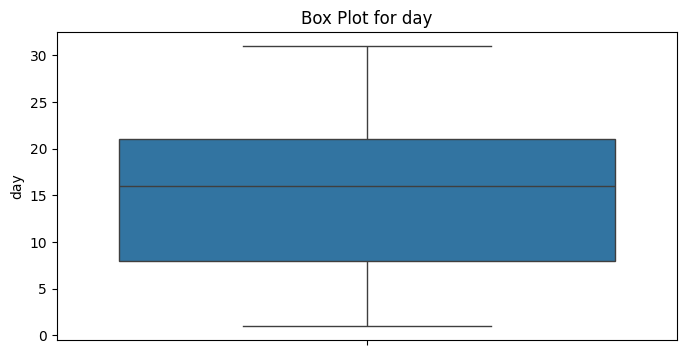

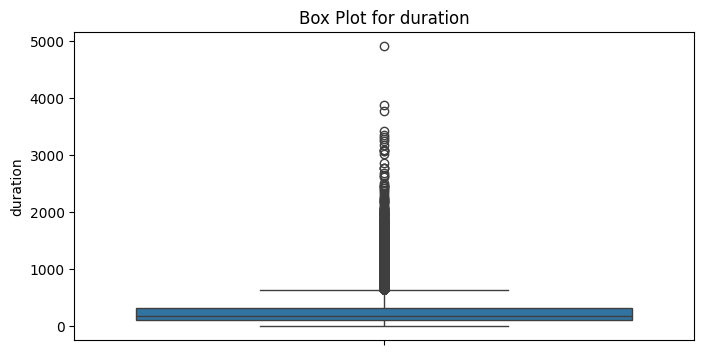

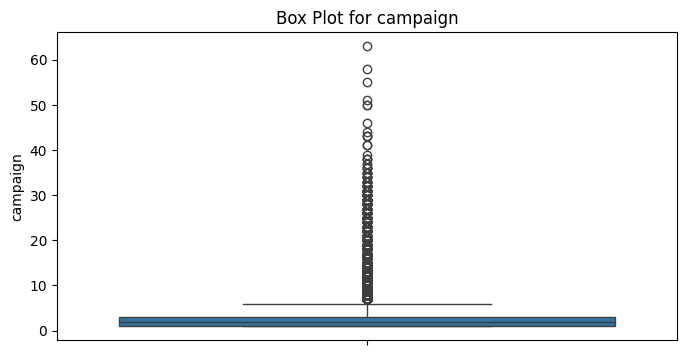

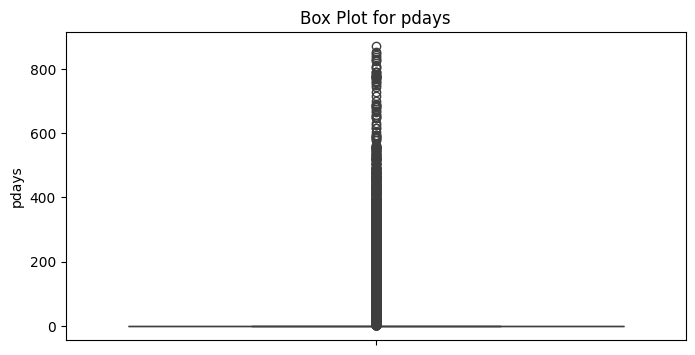

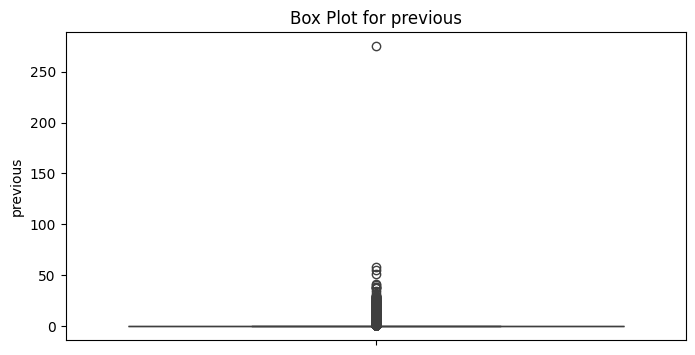

Descriptive Statistics:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%

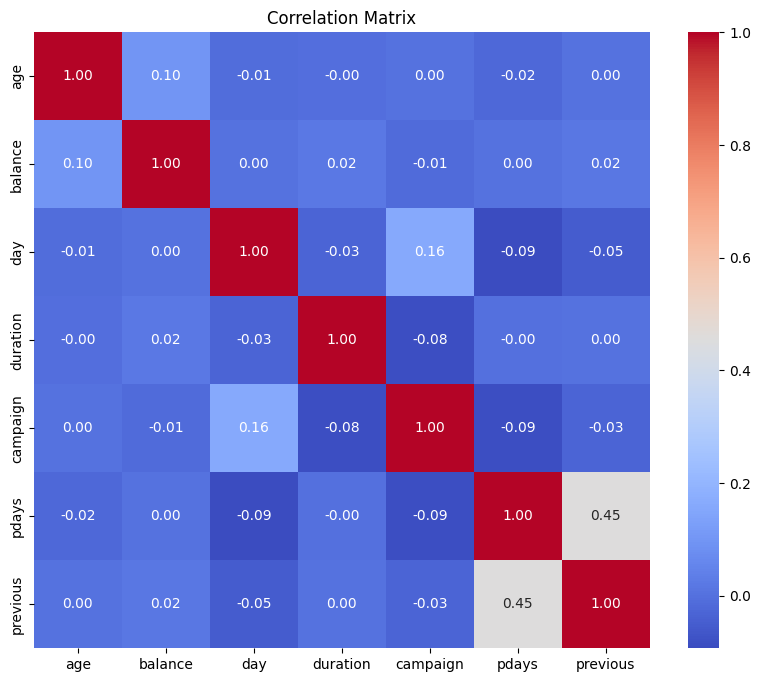

Outliers detected in age:
        age      job   marital  education default  balance housing loan  \
29159  83.0  retired   married    primary      no    425.0      no   no   
29262  75.0  retired  divorced    primary      no     46.0      no   no   
29264  75.0  retired   married    primary      no   3324.0      no   no   
29323  83.0  retired   married   tertiary      no   6236.0      no   no   
29866  75.0  retired  divorced    primary      no   3881.0     yes   no   
...     ...      ...       ...        ...     ...      ...     ...  ...   
45164  71.0  retired   married  secondary      no   2064.0      no   no   
45192  75.0  retired  divorced   tertiary      no   3810.0     yes   no   
45205  73.0  retired   married  secondary      no   2850.0      no   no   
45208  71.0  retired  divorced    primary      no   1729.0      no   no   
45209  72.0  retired   married  secondary      no   5715.0      no   no   

         contact   day month  duration  campaign  pdays  previous poutcom

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tệp CSV
column_names = ["age", 'job', 'marital', 'education', 'default', 'balance', 
                'housing', 'loan', 'contact', 'day', 'month', 
                'duration', 'campaign', 'pdays', 'previous','poutcome','y']

# Đảm bảo sử dụng dấu phân cách ';'
dataset = pd.read_csv("data/bank-full.csv", names=column_names, sep=";", skipinitialspace=True)

# Danh sách các cột số
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for column in numerical_columns:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')  # Convert and handle invalid values
# 1. Vẽ biểu đồ tần suất và mật độ
def plot_histograms(dataframe):
    for column in numerical_columns:
        plt.figure(figsize=(14, 6))

        # Biểu đồ tần suất (trái)
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[column], kde=False, bins=30)
        plt.title(f"Histogram of Frequencies for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")

        # Biểu đồ mật độ (phải)
        plt.subplot(1, 2, 2)
        sns.histplot(dataframe[column], kde=True, stat="density", bins=30)
        plt.title(f"Histogram of Densities for {column}")
        plt.xlabel(column)
        plt.ylabel("Density")

        plt.tight_layout()
        plt.show()

# 2. Vẽ biểu đồ hộp để phát hiện giá trị ngoại lai
def plot_boxplots(dataframe):
    for column in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(y=dataframe[column])
        plt.title(f"Box Plot for {column}")
        plt.ylabel(column)
        plt.show()

# 3. Tính toán số liệu thống kê mô tả
def calculate_statistics(dataframe):
    stats = dataframe[numerical_columns].describe()
    print("Descriptive Statistics:")
    print(stats)

# 4. Vẽ bảng tương quan
def plot_correlation_matrix(dataframe):
    plt.figure(figsize=(10, 8))
    correlation_matrix = dataframe[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation Matrix")
    plt.show()

# 5. Phát hiện các giá trị ngoại lai bằng IQR
def detect_outliers(dataframe):
    outliers = {}
    for column in numerical_columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        outliers[column] = dataframe[outlier_mask]
        
        print(f"Outliers detected in {column}:")
        print(outliers[column])

# Gọi các hàm để thực hiện phân tích thống kê mô tả
plot_histograms(dataset)
plot_boxplots(dataset)
calculate_statistics(dataset)
plot_correlation_matrix(dataset)
detect_outliers(dataset)
